In [1]:
# Dependencies and boilerplate
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'stations']

In [3]:
Measurement = Base.classes.measurement
Stations = Base.classes.stations

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'stations']

In [5]:
# Reflect Database into ORM class
Stations = Base.classes.stations
Measurements = Base.classes.measurement

In [6]:
# Start a session to query the database
session = Session(engine)

In [7]:
# last date in the measurement table
last_date = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()
print(last_date)

(datetime.date(2017, 8, 23),)


In [8]:
# last year date
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [9]:
# Last 12 months of precipitation
last_year 
prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>= last_year).\
    order_by(Measurement.date).all()
 
prcp_results_df = pd.DataFrame(prcp_results)
prcp_avg_df = prcp_results_df.groupby('date',as_index=False)['prcp'].mean()
prcp_avg_df

,date,prcp
0,2016-08-23,0.387143
1,2016-08-24,1.332857
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.053333
5,2016-08-28,0.516667
6,2016-08-29,0.208571
7,2016-08-30,0.011667
8,2016-08-31,0.454286
9,2016-09-01,0.005000


In [10]:
# Last Date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

(datetime.date(2017, 8, 23),)


In [11]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [12]:
# reset the index to the date
prcp_avg_df.set_index('date').head()

,prcp
date,
2016-08-23,0.387143
2016-08-24,1.332857
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.053333


In [13]:
#Print precipitation summary statistics
prcp_avg_df.describe()

,prcp
count,366.000000
mean,0.156734
std,0.275544
min,0.000000
25%,0.008571
50%,0.065357
75%,0.176786
max,2.040000


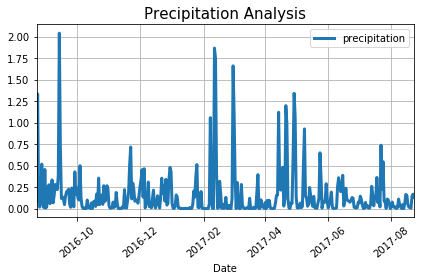

In [14]:
# Precipiation Plot

prcp_avg_df.plot('date', 'prcp', label='precipitation', rot=-320, linewidth=3, grid=True)

plt.title("Precipitation Analysis", fontsize=15)
plt.xlabel("Date", fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
# Count the number of stations in the Measurement table
stations_count = session.query(Measurements).\
    group_by(Measurement.station).count()
print(f'There are {stations_count} stations.')

There are 9 stations.


In [16]:
# Find the station with the most temperature observations, then list them all in descending order
stations_obs = session.query(Measurements.station, Stations.name, func.count(Measurements.tobs)).\
    join(Stations, Measurement.station==Stations.station).\
    group_by(Stations.name).\
    order_by(func.count(Measurements.tobs).desc()).all()

busiest_station = stations_obs[0][0]
busiest_station_name = stations_obs[0][1]

stations_obs_df = pd.DataFrame(stations_obs, columns=['station', 'name', 'tobs'])
stations_obs_df

,station,name,tobs
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [17]:
print(f'The busiest station was {busiest_station_name}, {busiest_station}')

The busiest station was WAIHEE 837.5, HI US, USC00519281


In [18]:
# Filter by the station with the highest number of observations.
highest_station_tobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= last_year).\
    filter(Measurement.station==busiest_station).\
    order_by(Measurement.date).all()
    
# Converts query to dataframe
higher_station_tobs_df = pd.DataFrame(highest_station_tobs)
higher_station_tobs_df.head()

,station,tobs
0,USC00519281,77
1,USC00519281,77
2,USC00519281,80
3,USC00519281,80
4,USC00519281,75


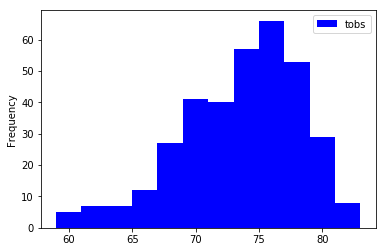

In [19]:
# Plot Histogram chart with bin=12  
# Station with the highest number of observations
plt.hist(higher_station_tobs_df['tobs'],12, color='blue')
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

In [29]:
# Temperature Analysis
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()
    
temp_range = (calc_temps('2017-08-01', '2017-08-06'))
print(temp_range) 

[(72, 79.04166666666667, 83)]


In [28]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year
trip_start = dt.date(2017, 8, 1)
trip_end = dt.date(2017, 8, 6)
last_year_c = dt.timedelta(days=365)

temp_range_last_year = (calc_temps((trip_start-last_year_c), (trip_end-last_year_c)))
print(temp_range_last_year)

[(72, 77.63157894736842, 82)]


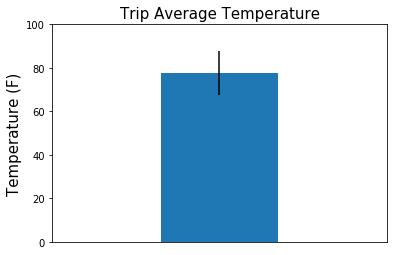

In [25]:
# Bar Chart

min_temp = temp_range_last_year[0][0]
avg_temp = temp_range_last_year[0][1]
max_temp = temp_range_last_year[0][2]
peak_to_peak = max_temp - min_temp

fig, ax = plt.subplots()
ax.bar(1, avg_temp, width=0.7, yerr=peak_to_peak)
ax.set_xlim(0, 2)
ax.set_ylim(0, 100)
plt.xticks([])
plt.title("Trip Average Temperature", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)

plt.show()
